# Level 1
---
### Task 1: Data Exploration and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Explore the dataset and identify the numberof rows and columns.

In [4]:
print(f'{df.shape[0]} rows\n{df.shape[1]} columns')

9551 rows
21 columns


#### Check for missing values in each column and handle them accordingly.

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Removing 9 rows with null values in Cusines column
df.dropna(subset=['Cuisines'],inplace=True)

In [7]:
# Checking for duplicate rows
df.duplicated().sum()

0

#### Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

In [8]:
target = df['Aggregate rating']

In [9]:
target.describe()

count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

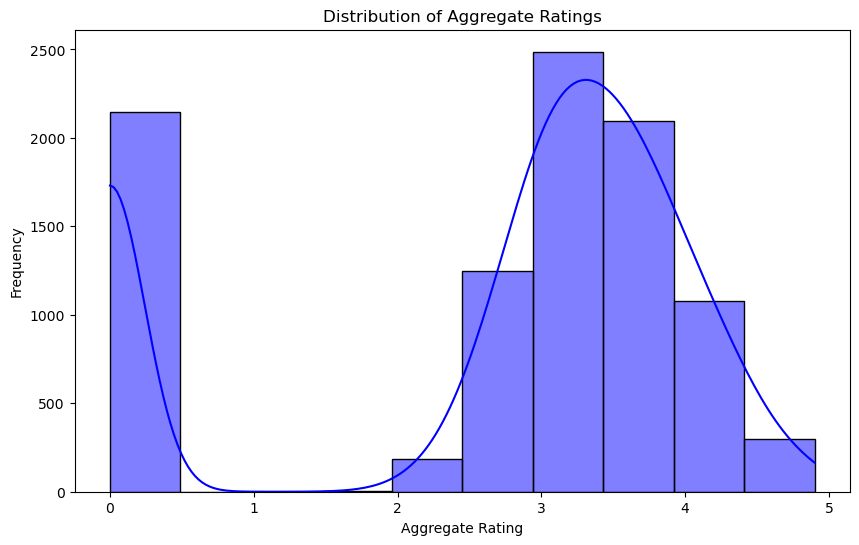

In [10]:
plt.figure(figsize=(10,6))

sns.histplot(target, kde=True, color='blue', bins=10)

plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()


In [11]:
bins = [0, 2.9, 3.9, 5.0]
labels = ['Low', 'Medium', 'High']

# Creating a new column with the binned rating categories
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)

# Checking the distribution of ratings in categories
df['Rating Category'].value_counts()


Rating Category
Medium    4583
Low       1433
High      1378
Name: count, dtype: int64

As we can see, the **Medium** category is significantly overrepresented compared to the **Low** and **High** categories, which are underrepresented. This imbalance could potentially lead to a bias in the model, where predictions might be skewed toward the **Medium** category. 

---

### Task 2:  Descriptive Analysis

#### Calculate basic statistical measures (mean,median, standard deviation, etc.) for numerical columns.

In [12]:
statistics = df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].describe()
statistics

,Average Cost for two,Price range,Aggregate rating,Votes
count,9542.000000,9542.000000,9542.000000,9542.000000
mean,1200.326137,1.804968,2.665238,156.772060
std,16128.743876,0.905563,1.516588,430.203324
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,130.000000
max,800000.000000,4.000000,4.900000,10934.000000


#### Explore the distribution of categorical variables like "Country Code", "City" and "Cuisines". Identify the top cuisines and cities with the highest number of restaurants.

In [13]:
# Distribution of "Country Code"
country_code_dist = df['Country Code'].value_counts()
country_code_dist

Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

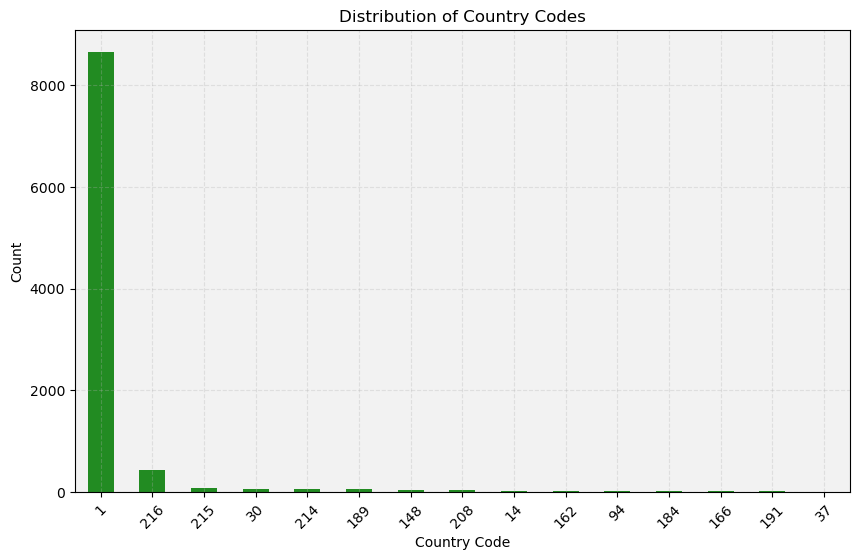

In [14]:
plt.figure(figsize=(10, 6))
country_code_dist.plot(kind='bar', color='ForestGreen')
plt.title('Distribution of Country Codes')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.gca().set_facecolor('#f2f2f2')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.show()


In [15]:
# Distribution of "City"
city_dist = df['City'].value_counts()
top_cities = city_dist.head(10)
top_cities


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64

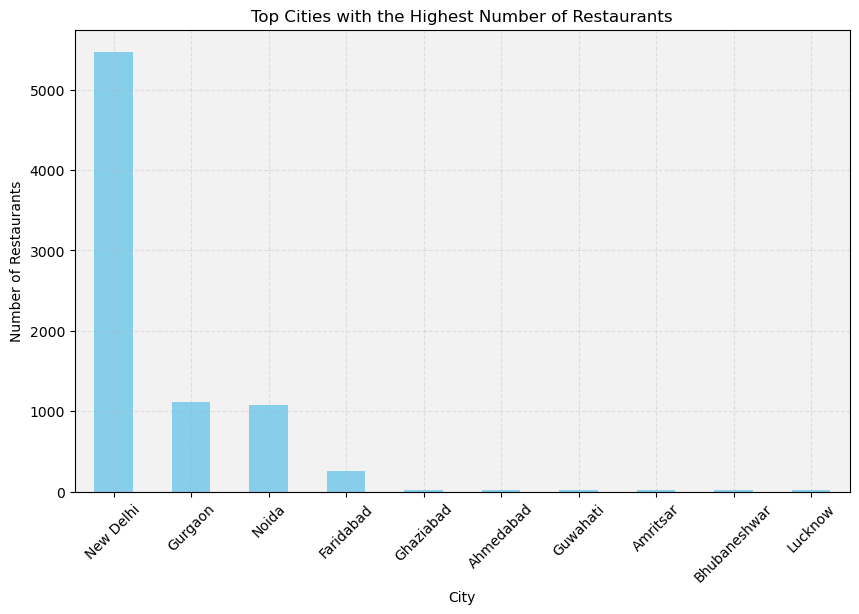

In [16]:
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top Cities with the Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.gca().set_facecolor('#f2f2f2')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [17]:
# Distribution of "Cuisines"
cuisines_split = df['Cuisines'].str.split(',', expand=True).stack().str.strip()
cuisine_dist = cuisines_split.value_counts()
top_cuisines = cuisine_dist.head(10)
top_cuisines


North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64

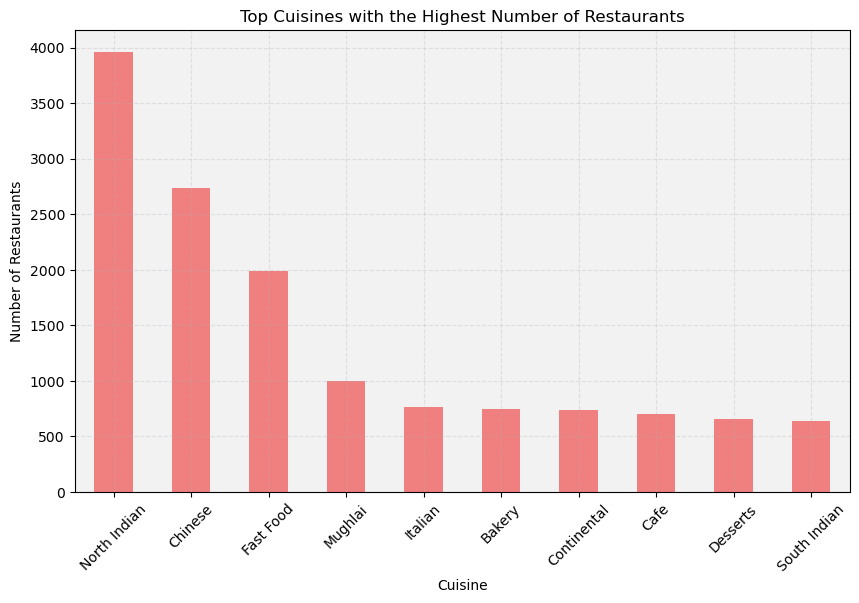

In [18]:
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='bar', color='lightcoral')
plt.title('Top Cuisines with the Highest Number of Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.gca().set_facecolor('#f2f2f2')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

---
### Task 3: Geospatial Analysis

#### Visualize the locations of restaurants on a map using latitude and longitude information.

In [ ]:
mean_lat = df['Latitude'].mean()
mean_lon = df['Longitude'].mean()
restaurant_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=12)

marker_cluster = MarkerCluster().add_to(restaurant_map)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(marker_cluster)

restaurant_map

![Map Screenshot](map_screenshot.png)
[Click here to view the interactive map in the notebook](https://nbviewer.org/github/pravatn01/Internship-Task/blob/main/Level_1.ipynb)

#### Analyze the distribution of restaurants across different cities or countries. Determine if there is any correlation between the restaurant's location and its rating.

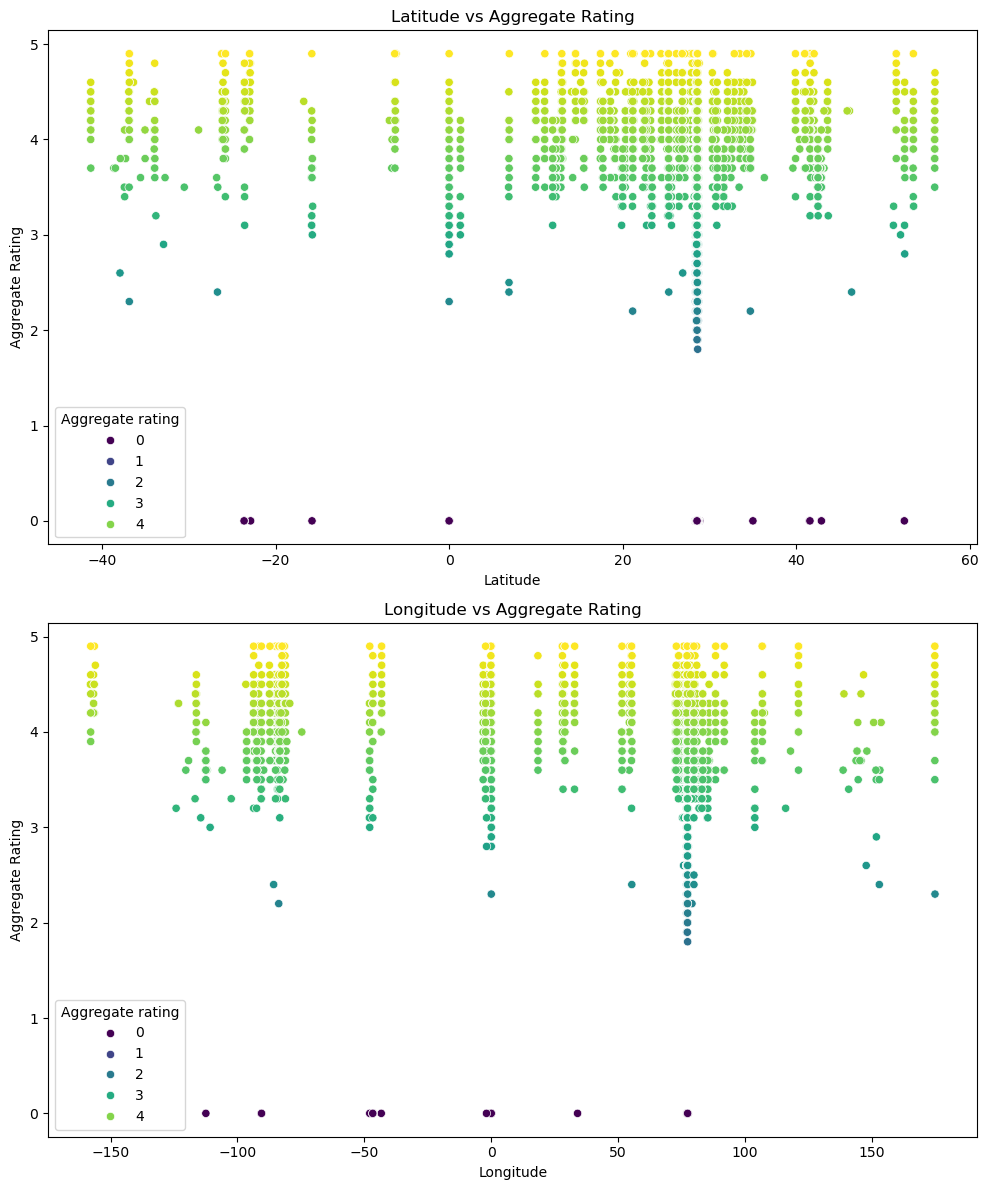

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=False, sharey=False)

sns.scatterplot(
    data=df, x='Latitude', y='Aggregate rating', hue='Aggregate rating',
    palette='viridis', ax=axes[0]
)
axes[0].set_title('Latitude vs Aggregate Rating')
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Aggregate Rating')

sns.scatterplot(
    data=df, x='Longitude', y='Aggregate rating', hue='Aggregate rating',
    palette='viridis', ax=axes[1]
)
axes[1].set_title('Longitude vs Aggregate Rating')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Aggregate Rating')

plt.tight_layout()
plt.show()



In [21]:
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
correlation_matrix


,Latitude,Longitude,Aggregate rating
Latitude,1.000000,0.045415,0.000197
Longitude,0.045415,1.000000,-0.114733
Aggregate rating,0.000197,-0.114733,1.000000


#### Insight: Correlation Between Location and Rating
- The correlation between **Latitude** and **Aggregate Rating** is **0.0002**, and between **Longitude** and **Aggregate Rating** is **-0.1147**.

- Both values indicate **no significant linear relationship** between a restaurant's geographic location and its rating.

- Visual inspection of scatter plots confirms that ratings are evenly distributed across locations.